<a href="https://colab.research.google.com/github/prawizard/CE888_Repo/blob/main/Lab_3/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# df=pd.read_csv("bank-additional-full.csv")

df=pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter=";")

# Uploaded the file to session storage. Not fetching using the http link.
# print(df.head())
# X = df.iloc[:, :-1].values
# y = df.iloc[:, -1].values
# print(type(X))
# print(type(y))
# X.shape
# y.shape

In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(df.iloc[:, -1].values)
# X=np.array([[]])
# for col in [1,2,3,4,5,6,7,8,9,14]:
#   le=LabelEncoder()
#   temp=le.fit_transform(df.iloc[:, col].values)
#   np.append(X,temp)
# df_dummies=pd.get_dummies(df, columns=["job","marital"])
# df_dummies
y

array([0, 0, 0, ..., 0, 1, 0])

In [4]:
df_dummies=pd.get_dummies(df)
df_dummies.drop('y_no', inplace=True, axis=1)
df_dummies.drop('y_yes', inplace=True, axis=1)
df_dummies.drop('duration', inplace=True, axis=1)
df_dummies.dropna()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [5]:
df_dummies

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [6]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,3,4,5,6,7,8,9,14])], remainder='passthrough')
# X=ct.fit_transform(X)



In [7]:
# df_dummies.columns.values.tolist()

In [8]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# y=le.fit_transform(y)

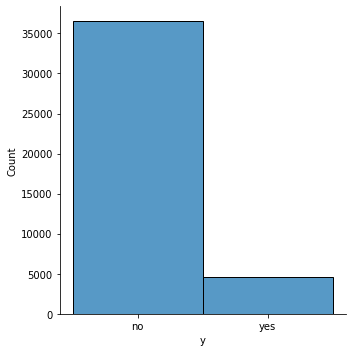

In [9]:
sns.displot(df, x="y")

In [38]:
y
from collections import Counter
count=Counter(y)
round(count[1]/len(y)*100,2)

11.27

In [11]:
from sklearn.model_selection import train_test_split
X=df_dummies.iloc[:, :].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50, stratify=y)

In [12]:
X_train.shape[0]/X.shape[0]

0.7999902884335244

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, max_depth=3)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, accuracy_score
from sklearn import metrics
scores = cross_val_score(classifier, X_train, y_train, cv=10, scoring="f1")

In [53]:
np.mean(scores)

0.24988655954097325

In [17]:
from sklearn.dummy import DummyClassifier
dummy_clf=DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train,y_train)
# y_dummy=dummy_clf.predict(X_train)
dummy_clf.score(X_train,y_train)

0.8002427921092564

In [68]:
dummy_scores = cross_val_score(dummy_clf, X_train, y_train, cv=10, scoring="f1")
print(dummy_scores)
round(np.mean(dummy_scores),2)

[0.10092961 0.10526316 0.11185087 0.1027027  0.13178295 0.13605442
 0.11686587 0.08310249 0.07923497 0.12929849]


0.11

In [19]:
print("RF Classifier score : ",accuracy_score(y_train,classifier.predict(X_train)))
print("Dummy Classifier score : ",accuracy_score(y_train, dummy_clf.predict(X_train)))

RF Classifier score :  0.8973596358118361
Dummy Classifier score :  0.8033080424886191


In [20]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [100, 50, 200, 300], 'max_depth': [3,5,7,10],'criterion': ["entropy"]},
              {'n_estimators': [100, 50, 200, 300], 'max_depth': [3,5,7,10], 'criterion': ["gini"]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 90.11 %
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200}


In [21]:
bestClassifier=RandomForestClassifier(n_estimators=200, max_depth=10)
bestClassifier.fit(X_train,y_train)
accuracy_score(y_train,bestClassifier.predict(X_train))

0.9137784522003035

In [22]:
best_scores = cross_val_score(bestClassifier, X_train, y_train, cv=10, scoring="accuracy")

In [23]:
np.mean(best_scores)

0.9009711684370257

In [24]:
accuracy_score(y_test,bestClassifier.predict(X_test))

0.900825443068706

In [25]:
importances=grid_search.best_estimator_.feature_importances_
importances

array([4.11272591e-02, 1.84997369e-02, 8.02598115e-02, 2.56133631e-02,
       9.91379000e-02, 5.81942036e-02, 7.18708771e-02, 1.40684516e-01,
       1.35665718e-01, 4.06850315e-03, 6.50656806e-03, 1.87763469e-03,
       2.08625642e-03, 2.64235001e-03, 4.37779901e-03, 2.48682048e-03,
       3.02694543e-03, 4.07881549e-03, 3.61579320e-03, 2.25824614e-03,
       1.56489530e-03, 3.27499183e-03, 4.58874607e-03, 5.02778094e-03,
       7.95017032e-04, 3.52550331e-03, 2.44661746e-03, 4.00274856e-03,
       4.36771020e-03, 1.74298846e-04, 3.60237343e-03, 6.04544970e-03,
       2.81277247e-03, 7.21834569e-03, 6.58720479e-03, 2.30983621e-07,
       4.89749354e-03, 1.95439515e-03, 4.69157498e-03, 4.24379447e-03,
       1.98102203e-03, 3.82340806e-03, 1.58674585e-02, 1.72630027e-02,
       7.66432969e-03, 2.79739818e-03, 1.43462959e-03, 2.92710021e-03,
       5.97763992e-03, 1.10483591e-02, 1.73823473e-02, 2.69700590e-03,
       1.29687932e-02, 3.24665661e-03, 5.03024613e-03, 7.44914668e-03,
      

In [73]:
top_3_idx = np.argsort(importances)[-3:]
top_3_values = [importances[i] for i in top_3_idx]

In [27]:
top_3_idx 

array([4, 8, 7])

In [28]:
print(df_dummies.columns.values.tolist()[4])
print(df_dummies.columns.values.tolist()[8])
print(df_dummies.columns.values.tolist()[7])

emp.var.rate
nr.employed
euribor3m


In [29]:
print("Error(test set) : ", 1-accuracy_score(y_test, bestClassifier.predict(X_test)))

Error(test set) :  0.09917455693129396


In [30]:
accuracy_score(y_test, bestClassifier.predict(X_test))

0.900825443068706

In [72]:
from sklearn.metrics import f1_score
tempClassifier=RandomForestClassifier(n_estimators=400, max_depth=6, random_state=60)
tempClassifier.fit(X_train,y_train)
round(f1_score(y_test,tempClassifier.predict(X_test)),2)

0.31

In [77]:
parameters = {'n_estimators': [100], 'max_depth': [12], 'random_state':[60]}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)


# tempClassifier=RandomForestClassifier(n_estimators=100, max_depth=12, random_state=60)
# tempClassifier.fit(X_train,y_train)
importances=grid_search.best_estimator_.feature_importances_
top_3_idx = np.argsort(importances)[-3:]
top_3_values = [importances[i] for i in top_3_idx]
print(df_dummies.columns.values.tolist()[top_3_idx[0]])
print(df_dummies.columns.values.tolist()[top_3_idx[1]])
print(df_dummies.columns.values.tolist()[top_3_idx[2]])

Best Accuracy: 90.03 %
Best Parameters: {'max_depth': 12, 'n_estimators': 100, 'random_state': 60}
poutcome_success
nr.employed
euribor3m
